In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage.filters import sobel
from skimage.draw import circle_perimeter
from skimage.morphology import *
from skimage.transform import hough_circle_peaks, hough_circle
from skimage.exposure import equalize_hist
import numpy as np
import cv2
import sys

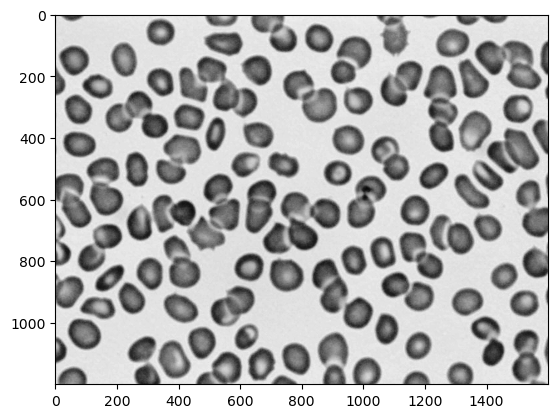

In [2]:
imagem = io.imread("0ac747cd-ff32-49bf-bc1a-3e9b7702ce9c.png")
red_img = imagem [:, :, 0]
green_img = imagem [:, :, 1]
blue_img = imagem [:, :, 2]
plt.imshow(red_img, cmap='gray')

plt.imshow(green_img, cmap='gray')

plt.imshow(blue_img, cmap='gray')

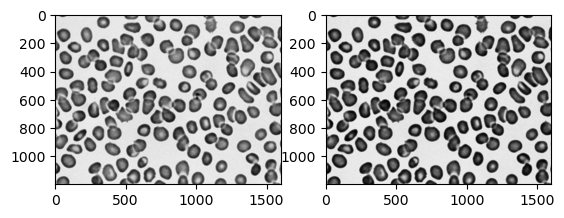

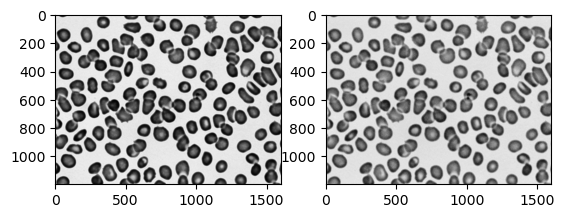

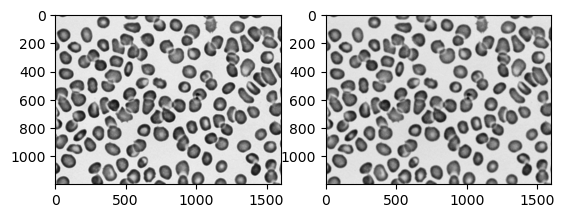

In [3]:
_,ax = plt.subplots (1,2)
ax[0].imshow (red_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (green_img,cmap='gray',vmin=0,vmax=255)
_,ax = plt.subplots (1,2)
ax[0].imshow (green_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (blue_img,cmap='gray',vmin=0,vmax=255)
_,ax = plt.subplots (1,2)
ax[0].imshow (red_img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow (blue_img,cmap='gray',vmin=0,vmax=255)

In [4]:
blue_img.shape

(1200, 1600)

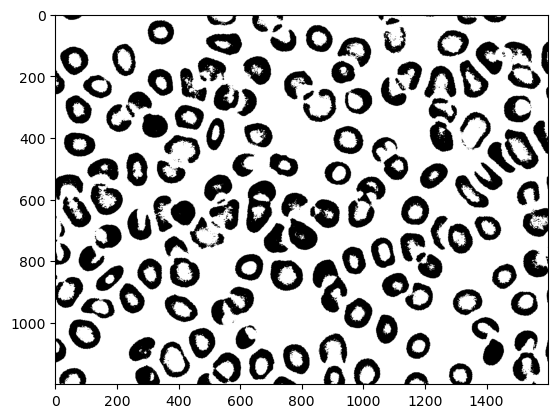

In [5]:
binaria = blue_img.copy()
limiar = imagem.max() * (110 / 256)
binaria [binaria <= limiar] = 0
binaria [binaria > 0] = 1
plt.imshow(binaria * 255, cmap='gray')

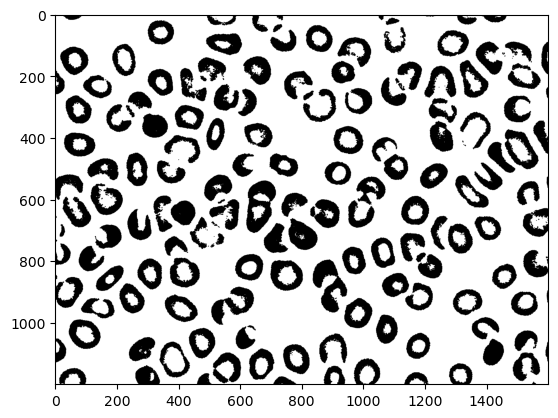

In [6]:
binary = binary_opening (binaria)
binary = binary_closing (binaria)

plt.imshow(binary, cmap='gray')

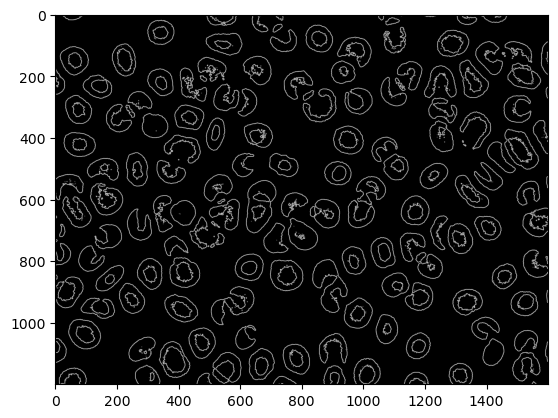

In [7]:
edges = sobel(binary)

plt.imshow(edges, cmap='gray')

In [12]:
raios = np.arange(40, 50, 2)
hough_grade = hough_circle (edges, raios)

In [14]:
acumulador, a, b, raio = hough_circle_peaks (hough_grade, raios,total_num_peaks = 200)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


200


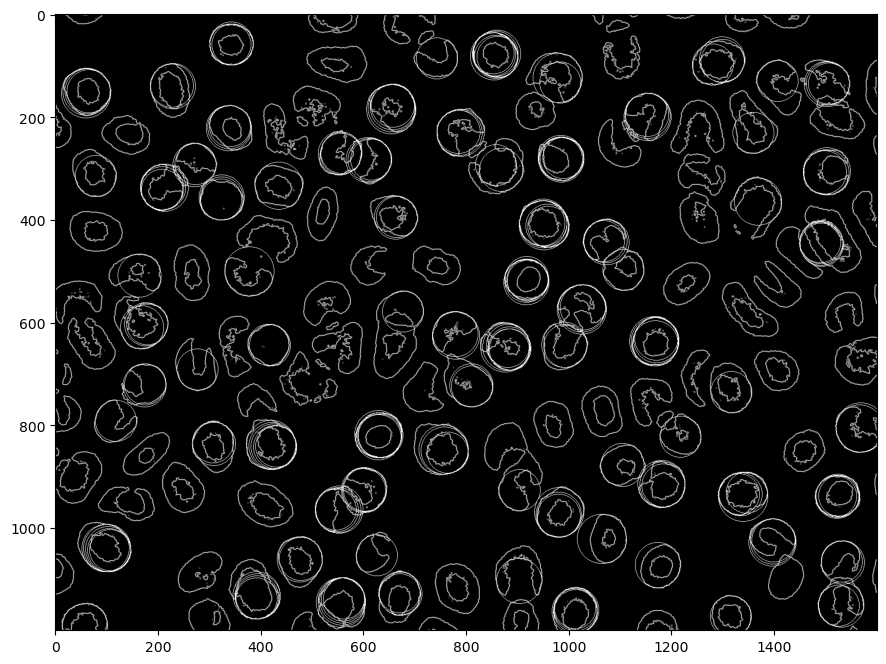

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))
image = color.gray2rgb(edges)

for center_y, center_x, radius in zip(b, a, raio):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape = image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
print(len(a))